In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from keras import regularizers
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/archive (2).zip" -d "/content/"

Archive:  /content/drive/MyDrive/archive (2).zip
   creating: /content/archive/Test/
   creating: /content/archive/Test/no/
  inflating: /content/archive/Test/no/1 no.jpeg  
  inflating: /content/archive/Test/no/10 no.jpg  
  inflating: /content/archive/Test/no/11 no.jpg  
  inflating: /content/archive/Test/no/12 no.jpg  
  inflating: /content/archive/Test/no/13 no.jpg  
  inflating: /content/archive/Test/no/14 no.jpg  
  inflating: /content/archive/Test/no/15 no.jpg  
  inflating: /content/archive/Test/no/17 no.jpg  
  inflating: /content/archive/Test/no/18 no.jpg  
  inflating: /content/archive/Test/no/19 no.jpg  
  inflating: /content/archive/Test/no/2 no.jpeg  
  inflating: /content/archive/Test/no/20 no.jpg  
  inflating: /content/archive/Test/no/21 no.jpg  
  inflating: /content/archive/Test/no/22 no.jpg  
  inflating: /content/archive/Test/no/23 no.jpg  
  inflating: /content/archive/Test/no/24 no.jpg  
  inflating: /content/archive/Test/no/25 no.jpg  
  inflating: /content/arch

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
  '/content/archive/Train',
  image_size=(224, 224),
  batch_size=32,
  seed=42,
  subset='training',
  validation_split=0.2,
  shuffle=True)
train_data.cache()
val_data = tf.keras.utils.image_dataset_from_directory(
  '/content/archive/Train',
  image_size=(224, 224),
  batch_size=32,
  seed=42,
  subset='validation',
  validation_split=0.2,
  shuffle=True)
val_data.cache()
#////////////////////////////////////////////
train_datagen = ImageDataGenerator(
    rotation_range=12,
    zoom_range=0.12,
    width_shift_range=0.4,
    height_shift_range=0.3,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
    '/content/archive/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle = True
)
val_generator = train_datagen.flow_from_directory(
    '/content/archive/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


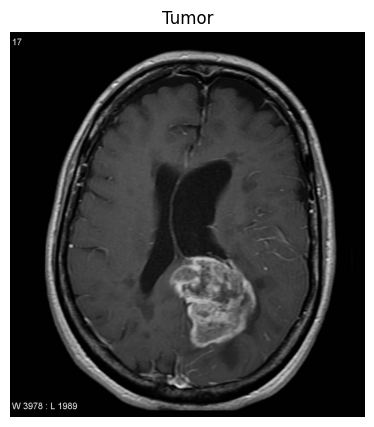

In [ ]:
image_path = "/content/archive/Train/yes/Y96.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

class_label = "Tumor"


plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title(class_label, fontsize=12)
plt.axis('off')
plt.show()

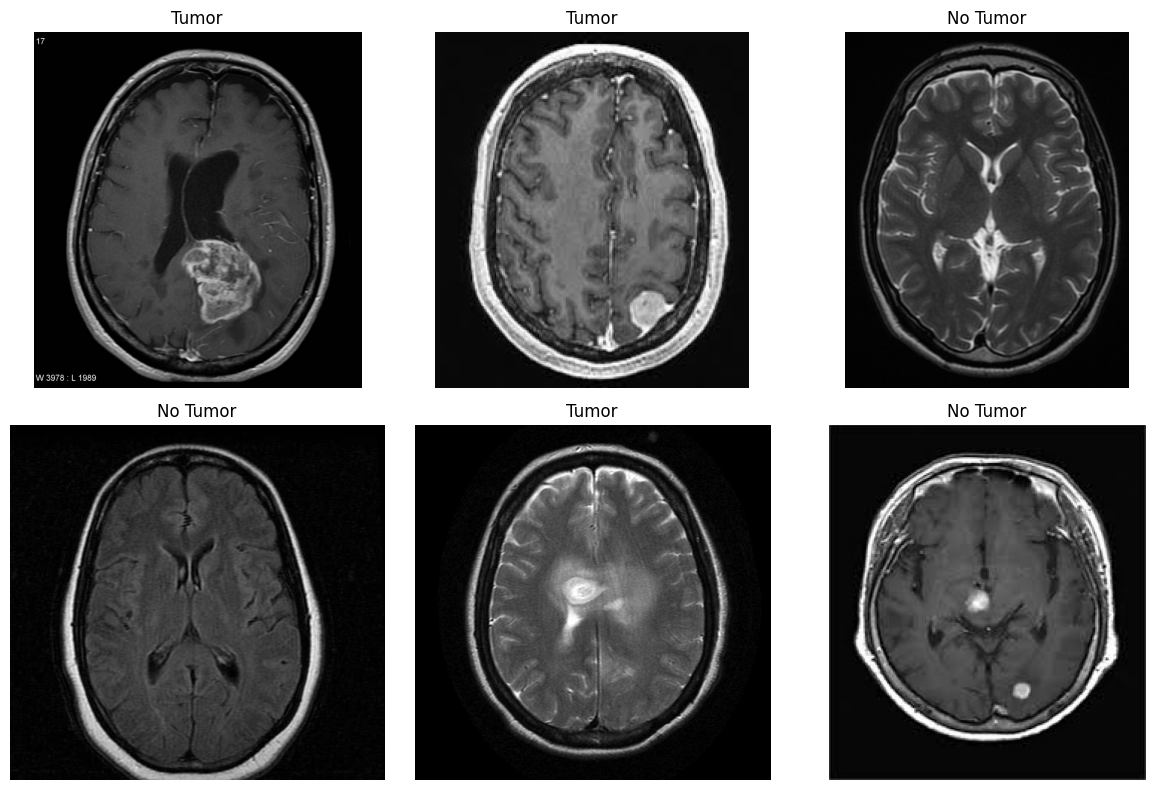

In [ ]:
image_paths = ["/content/archive/Train/yes/Y96.jpg", "/content/archive/Train/yes/Y56.jpg", "/content/archive/Train/no/No22.jpg", "/content/archive/Train/no/No20.jpg"
              ,"/content/archive/Test/yes/Y9.jpg", "/content/archive/Train/no/N16.jpg"]


class_labels = ["Tumor", "Tumor", "No Tumor", "No Tumor", "Tumor", "No Tumor"]


num_images = len(image_paths)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))


for i, (image_path, class_label) in enumerate(zip(image_paths, class_labels)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if num_rows > 1:
        ax = axes[i // num_cols, i % num_cols]
    else:
        ax = axes[i % num_cols]

    ax.imshow(image)
    ax.set_title(class_label, fontsize=12)
    ax.axis('off')


plt.tight_layout()

plt.show()

In [ ]:
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in vgg16.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27,560,769
Trainable params: 12,846,081
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
len(train_generator)

7

In [ ]:
batch_size = 32
history = model.fit(train_generator, validation_data=val_generator, epochs = 5)

Epoch 1/5
7/7 [==============================] - 27s 1s/step - loss: 46.0482 - accuracy: 0.5813 - val_loss: 1.3228 - val_accuracy: 0.7400
Epoch 2/5
7/7 [==============================] - 5s 731ms/step - loss: 1.7144 - accuracy: 0.7241 - val_loss: 1.4660 - val_accuracy: 0.6800
Epoch 3/5
7/7 [==============================] - 4s 506ms/step - loss: 1.0457 - accuracy: 0.7685 - val_loss: 0.8192 - val_accuracy: 0.8200
Epoch 4/5
7/7 [==============================] - 4s 522ms/step - loss: 0.8622 - accuracy: 0.7192 - val_loss: 0.5126 - val_accuracy: 0.8400
Epoch 5/5
7/7 [==============================] - 4s 605ms/step - loss: 0.6859 - accuracy: 0.7389 - val_loss: 0.8798 - val_accuracy: 0.6800


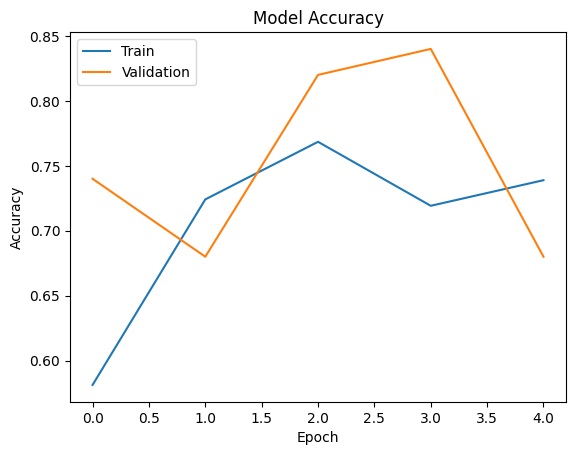

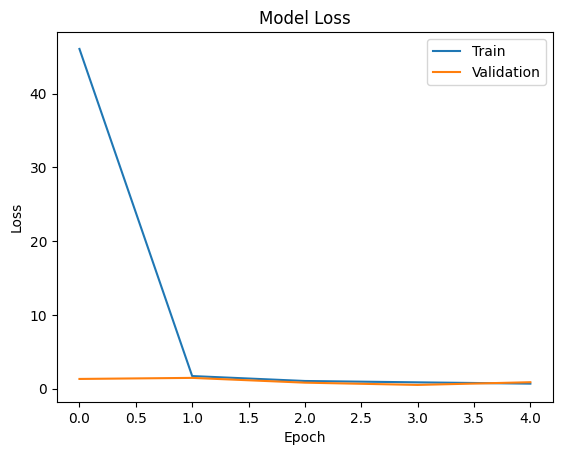

In [ ]:
# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Text(0, 0.5, 'Accuracy')

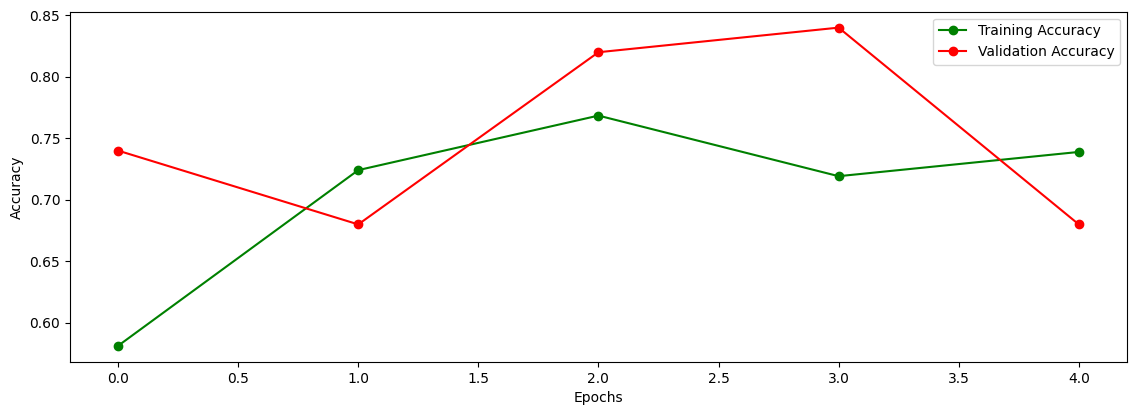

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,2)
x_train_acc = history.history['accuracy']
x_val_acc = history.history['val_accuracy']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

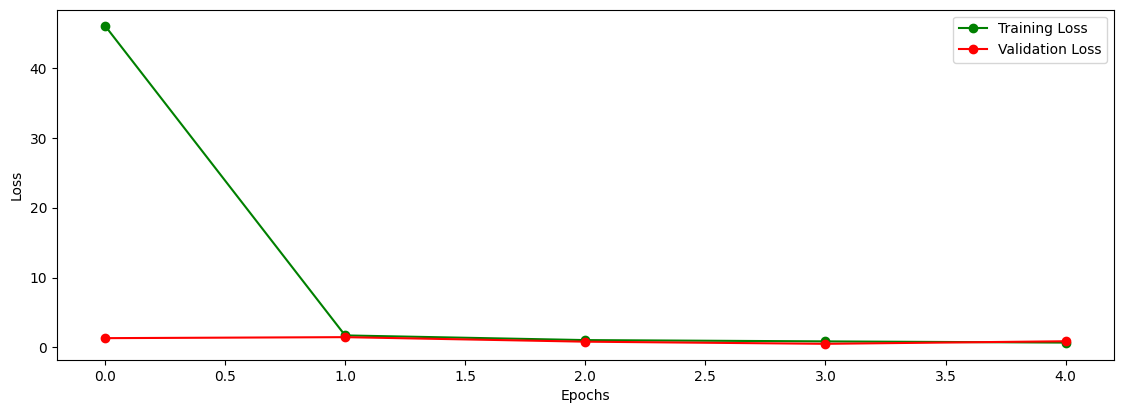

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,2)
x_train_acc = history.history['loss']
x_val_acc = history.history['val_loss']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Loss')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
vgg16.trainable = True
for layer in vgg16.layers[14:]:
    layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27,560,769
Trainable params: 20,481,345
Non-trainable params: 7,079,424
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
7/7 [==============================] - 9s 841ms/step - loss: 0.6077 - accuracy: 0.7882 - val_loss: 0.3288 - val_accuracy: 0.8800
Epoch 2/5
7/7 [==============================] - 5s 631ms/step - loss: 0.4019 - accuracy: 0.8227 - val_loss: 0.3344 - val_accuracy: 0.8000
Epoch 3/5
7/7 [==============================] - 5s 711ms/step - loss: 0.4438 - accuracy: 0.8227 - val_loss: 0.3769 - val_accuracy: 0.8200
Epoch 4/5
7/7 [==============================] - 6s 769ms/step - loss: 0.4620 - accuracy: 0.8128 - val_loss: 0.4307 - val_accuracy: 0.8200
Epoch 5/5
7/7 [==============================] - 5s 700ms/step - loss: 0.3417 - accuracy: 0.8670 - val_loss: 0.2884 - val_accuracy: 0.8800


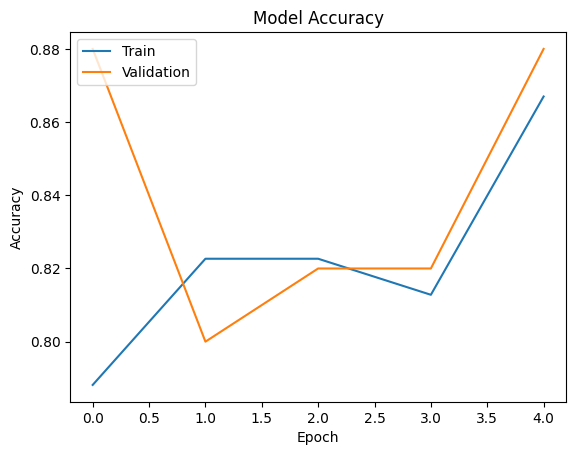

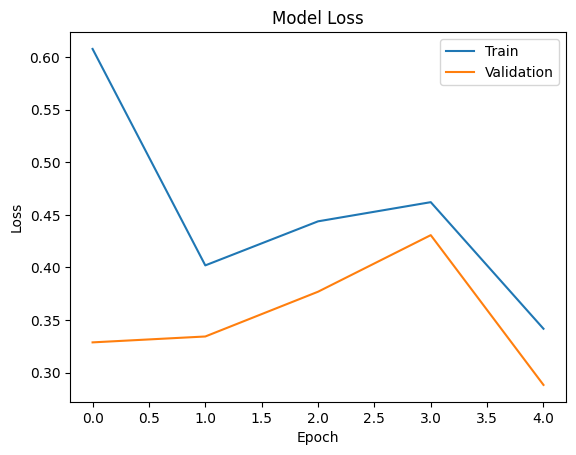

In [ ]:
# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Text(0, 0.5, 'Accuracy')

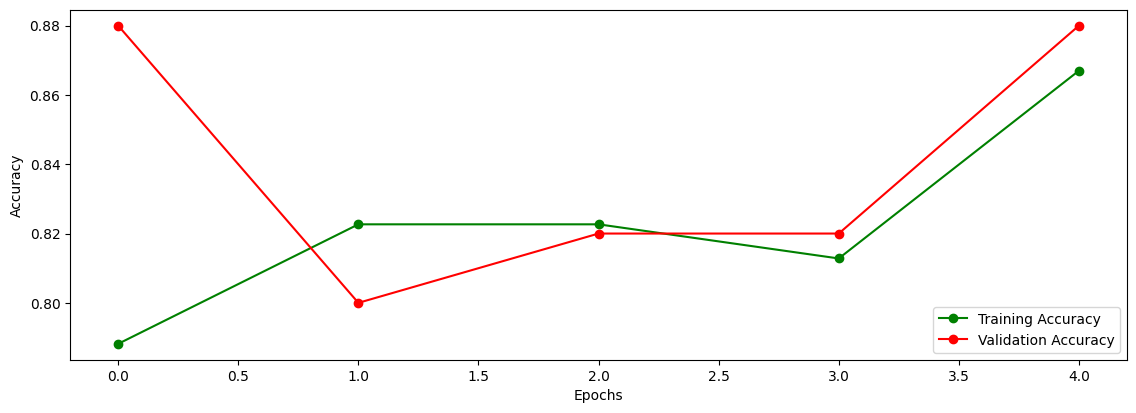

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,2)
x_train_acc = history.history['accuracy']
x_val_acc = history.history['val_accuracy']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

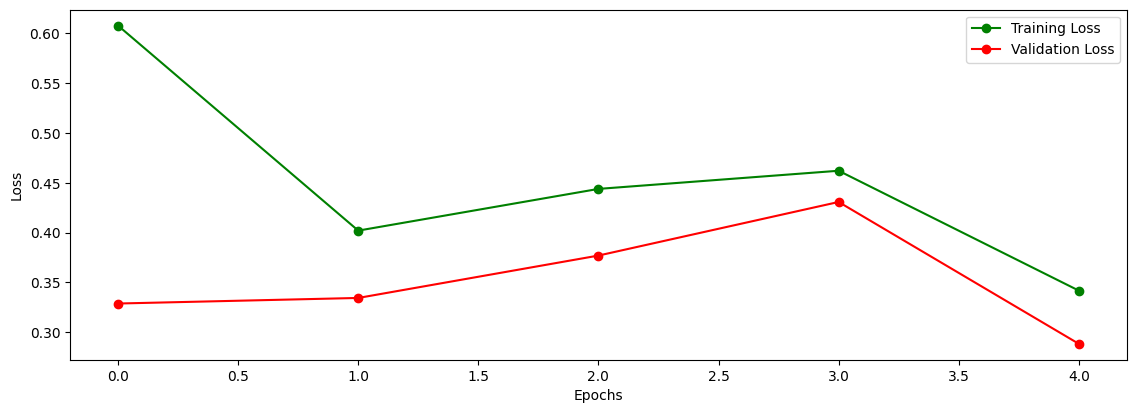

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,2)
x_train_acc = history.history['loss']
x_val_acc = history.history['val_loss']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Loss')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
model.save('MRI_brain_tumor_Classifier.h5')